## Proyecto 1 – Relación Minutos Ingreso

# Integrantes:
Marjoris Parejo

Leidys Valencia

Adriana Maldonado

Julio Cesar Rodríguez

### **Explicación del Problema**

**¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?**

La comprensión del comportamiento de los clientes es crucial para el desarrollo de estrategias efectivas en áreas como el mejoramiento de productos, publicidad y toma de decisiones. En este análisis, evaluaremos el conjunto de datos `Credito_dias.csv` de una empresa de telecomunicaciones, que incluye las siguientes variables:


<div align="center">


| **Variable**  | **Descripción**                                   | **Tipo**      |
|---------------|---------------------------------------------------|---------------|
| **totmou**    | Total de minutos usados por el cliente.           | Cuantitativa  |
| **totrev**    | Ingresos del cliente.                             | Cuantitativa  |
| **creditcd**  | Indicador de tarjeta de crédito.                  | Cualitativa   |
| **eqpdays**   | Número de días (antigüedad) del equipo actual.   | Cuantitativa  |
| **Custom_ID** | Identificación del cliente.                        | Cualitativa   |

</div>




Dado que la empresa tiene una base de clientes extensa, un análisis individual resulta poco práctico. A través de programación y análisis de datos, buscaremos identificar relaciones significativas entre el uso de minutos y los ingresos generados, con el fin de extraer conclusiones que puedan no ser evidentes a simple vista. Este enfoque permitirá a la empresa optimizar sus estrategias comerciales y mejorar su oferta de servicios.


Se realiza la importación de las librerias que se utilizarán para el desarrollo del proyecto

In [ ]:
# Cargar librerías
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# librerías relacionadas con modelos de regresión
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

Se importa el dataset creando un dataframe para observar la información y visualizar algunas filas de este para conocer su estructura

In [ ]:
df=pd.read_csv('Credito_dias.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [ ]:
df.shape

(10000, 5)

In [ ]:
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


Se visualizan los valores nulos por cada columna y en caso de haberlos se eliminan las filas que poseen esos datos para posteriormente trabajar con el dataframe limpio.

In [ ]:
df.isnull().sum()

,0
totmou,0
totrev,0
creditcd,152
eqpdays,0
Customer_ID,0


In [ ]:
#Eliminar filas con datos nulos
df= df.dropna()

In [ ]:
df.shape

(9848, 5)

## **Análisis exploratorio de variables**





### Análisis de variables númericas

#### **Histograma de `totrev` (Ingresos del Cliente)**



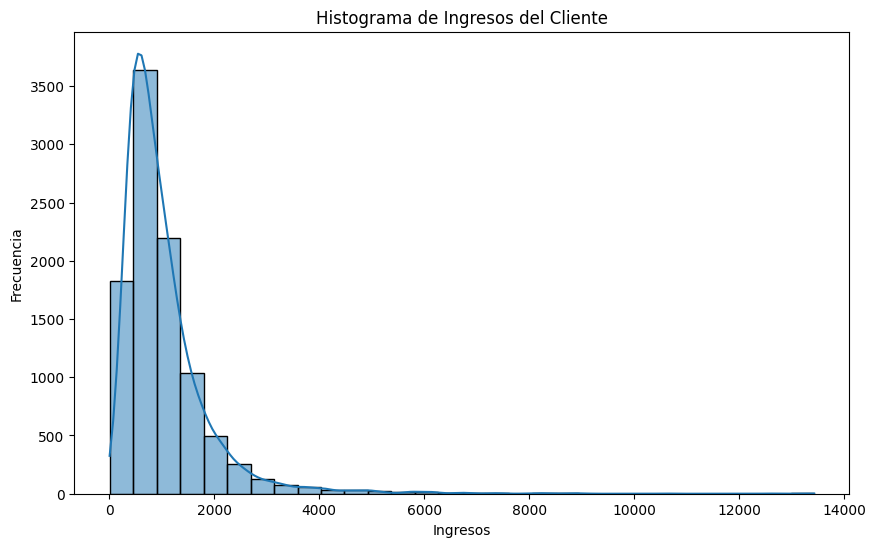

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totrev'], bins=30, kde=True)
plt.title('Histograma de Ingresos del Cliente')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()


Del histograma para la variable `totrev`se pudo observar lo siguiente:

**Asimetría positiva:** La distribución de los ingresos está sesgada hacia la derecha, lo que significa que la mayoría de los clientes tienen ingresos relativamente bajos, mientras que un menor número tiene ingresos muy altos.

**Concentración en valores bajos**: La mayor parte de la frecuencia se concentra en los primeros intervalos de ingresos, lo que sugiere que la base de clientes está compuesta principalmente por personas con ingresos moderados o bajos.

**Pocos valores atípicos:** No se observan valores extremadamente altos que puedan distorsionar significativamente la distribución. Sin embargo, es posible que existan algunos valores atípicos leves en la cola derecha.

#### **Histograma de `totmou` (Total de minutos Usados)**




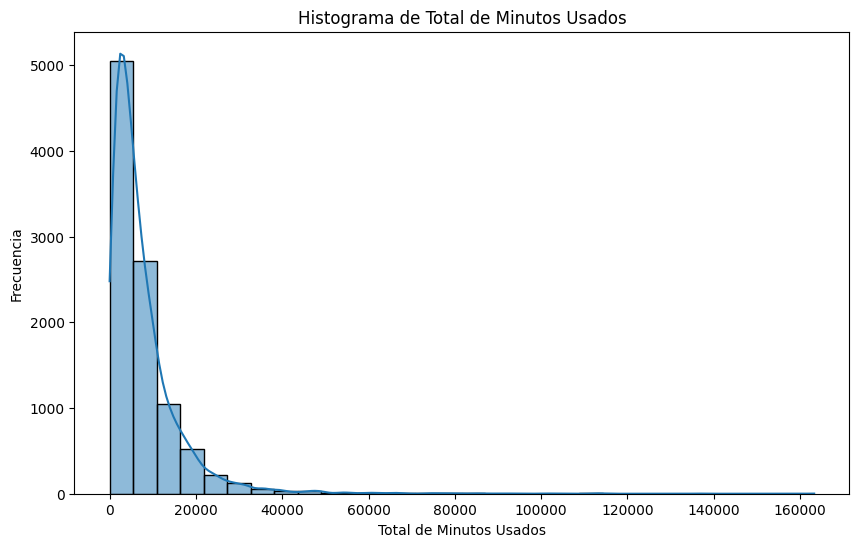

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totmou'], bins=30, kde=True)
plt.title('Histograma de Total de Minutos Usados')
plt.xlabel('Total de Minutos Usados')
plt.ylabel('Frecuencia')
plt.show()


Del histograma para la variable `totmou`se pudo observar lo siguiente:

**Asimetría positiva:** Esta distribución muestra una clara asimetría positiva. Esto indica que la mayoría de los usuarios consumen una cantidad relativamente baja de minutos, mientras que un número menor utiliza una cantidad significativamente mayor.

**Concentración en valores bajos:** La frecuencia más alta se observa en los primeros intervalos, lo que confirma que la mayoría de los usuarios se encuentran en el rango de bajo consumo.

**Poca frecuencia en valores altos:** Hacia la derecha del gráfico, la frecuencia disminuye rápidamente, lo que sugiere que hay pocos usuarios que consumen una gran cantidad de minutos.



**Histograma de `eqpdays` (Antigüedad del Equipo)**

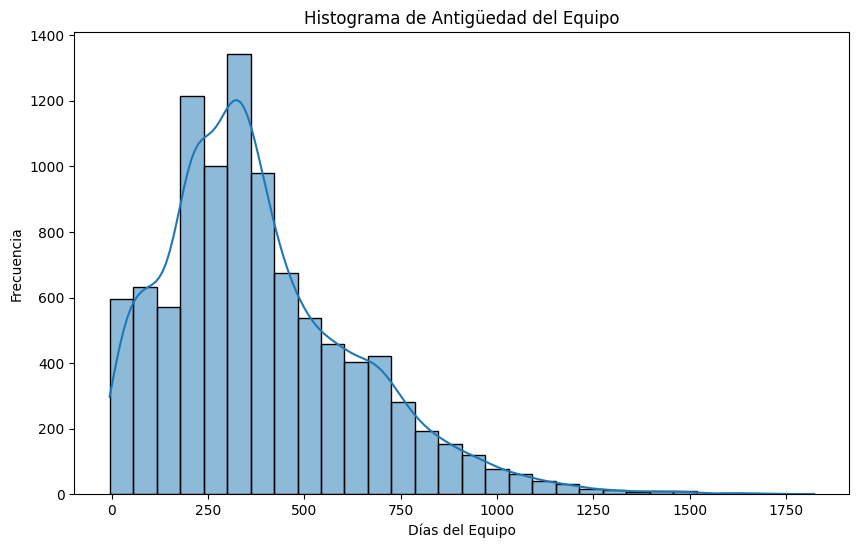

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['eqpdays'], bins=30, kde=True)
plt.title('Histograma de Antigüedad del Equipo')
plt.xlabel('Días del Equipo')
plt.ylabel('Frecuencia')
plt.show()


Del histograma para la variable `eqpdays`se pudo observar lo siguiente:

**Asimetría positiva:** La distribución de la antigüedad está sesgada hacia la derecha, lo que significa que la mayoría de los equipos son relativamente nuevos, mientras que un menor número tiene una antigüedad considerable.

**Concentración en valores bajos:** La mayor parte de la frecuencia se concentra en los primeros intervalos de antigüedad, lo que sugiere que la base de equipos está compuesta principalmente por equipos recientes.

**Pocos valores atípicos:** No se observan valores extremadamente altos que puedan distorsionar significativamente la distribución. Sin embargo, es posible que existan algunos valores atípicos leves en la cola derecha, es decir, equipos muy antiguos.

### Análisis de variables categóricas

**Diagrama de Barras para `creditcd` (Indicador de Tarjeta de Crédito)**

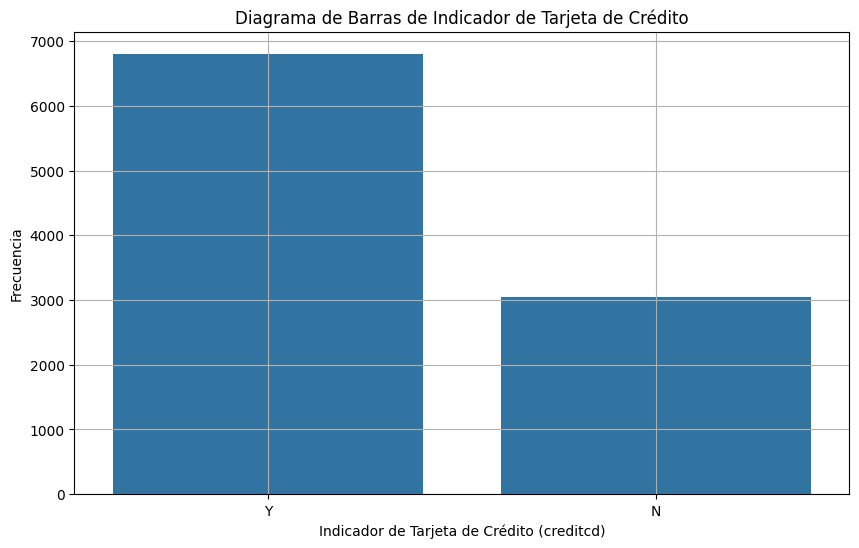

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='creditcd')  # Usando df como nombre del DataFrame
plt.title('Diagrama de Barras de Indicador de Tarjeta de Crédito')
plt.xlabel('Indicador de Tarjeta de Crédito (creditcd)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


Del diagrama de barras para la variable `creditcd`se pudo observar lo siguiente:

**Mayoría con tarjeta de crédito:**La barra correspondiente a la categoría "Y" es significativamente más alta que la de la categoría "N". Esto indica que la mayoría de los clientes en la muestra poseen una tarjeta de crédito.

**Desequilibrio:** Existe un desequilibrio claro en la proporción de clientes con y sin tarjeta de crédito. La diferencia en altura entre las barras sugiere que la posesión de una tarjeta de crédito es más común entre los clientes.

### **¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?**




Se construye una matriz de correlación para visualizar las relaciones entre las variables númericas.

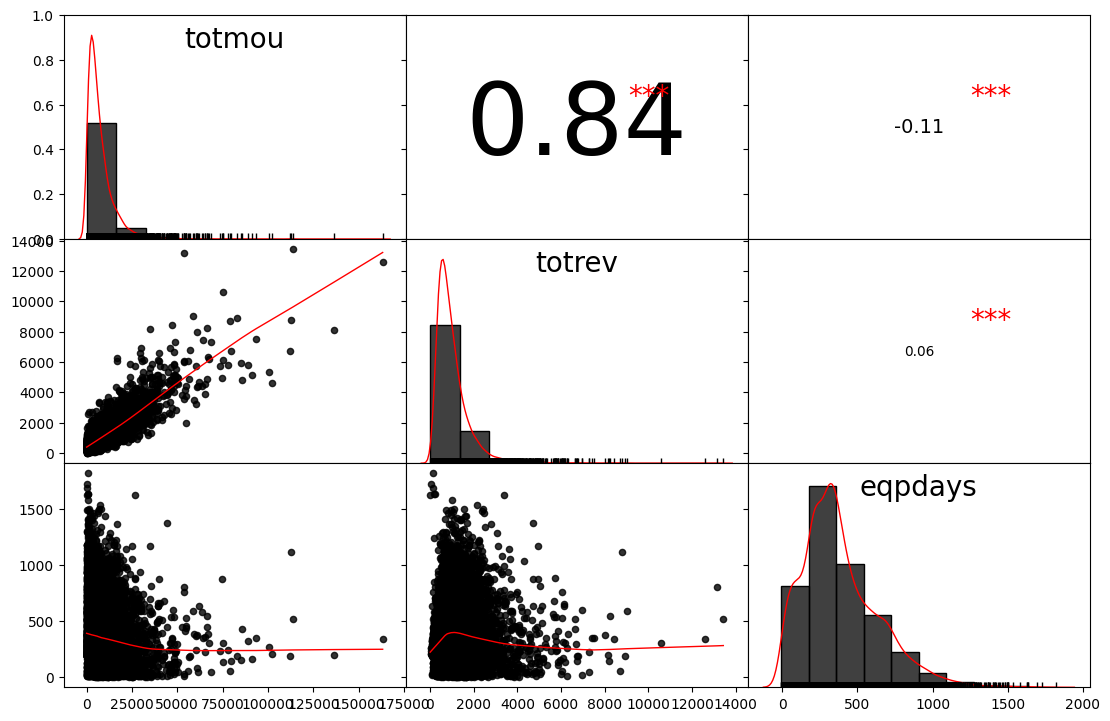

In [ ]:
# Matriz de correlaciones
df1=df[['totmou','totrev', 'eqpdays']] #tomar las variables numéricas

# Función para mostrar la correlación
def corrdot(x, y, **kwargs):
    corr_r = x.corr(y)
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5], xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# función para mostrar estrellas de significancia
def corrfunc(x, y, **kwargs):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.001:
        p_stars = '***'
    elif p <= 0.01:
        p_stars = '**'
    elif p <= 0.05:
        p_stars = '*'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=20)

# configura el PairGrid
g = sns.PairGrid(df1, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.histplot, color='black', bins=10, stat='density')  # Cambié a 'density'
g.map_diag(sns.kdeplot, color='red', lw=1)  # Agrega KDE en el diagonal
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# eliminar etiquetas de los ejes
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# añadir títulos a los ejes diagonales
for ax, col in zip(np.diag(g.axes), df1.columns):
    ax.set_title(col, y=0.82, fontsize=20)

plt.show()

Teniendo en cuenta el diagrama de dispersión, el coeficiente de correlación y la significancia mostradas en la gráfica anterior entre las variables `totmou` y `totrev`, se puede afirmar que existe una posible correlación positiva entre el total de minutos usados con la compañía y el ingreso total de los clientes.

Lo anterior sugiere que cuando una persona tiene un mayor ingreso, entonces es mayor la utilización de minutos.

### **¿El hecho de tener tarjeta de crédito afecta a la variable `totmou`o a la variable `totrev`?**


Con el siguiente diagrama de dispersión se analizará  la relación entre las variables `totmou` y `totrev`, y si poseen o no una tarjeta de crédito `CreditCD`

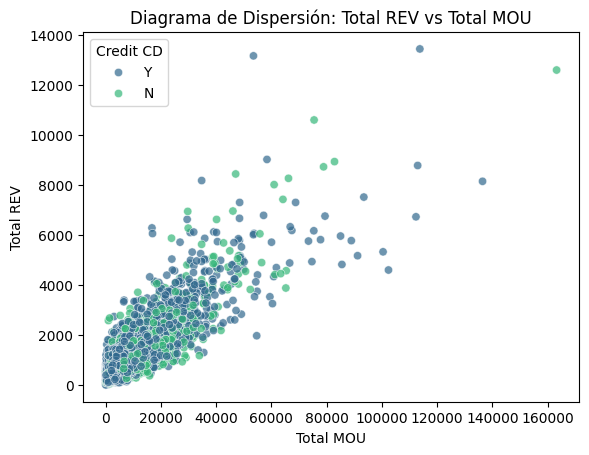

In [ ]:
# Crear el diagrama de dispersión
sns.scatterplot(data=df, x='totmou', y='totrev', hue='creditcd', palette='viridis', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Total MOU')
plt.ylabel('Total REV')
plt.title('Diagrama de Dispersión: Total REV vs Total MOU')
plt.legend(title='Credit CD')
plt.show()

El diagrama de dispersión muestra claramente que existe una relación positiva entre el total de minutos utilizados y los ingresos totales. Esto significa que, a medida que aumenta el consumo de minutos, también tienden a aumentar los ingresos.

Por otro lado, el diagrama no revela de forma clara que los clientes con tarjeta de crédito tienden a consumir más minutos y generar mayores ingresos en comparación con aquellos que no tienen tarjeta de crédito. Por lo tanto, hemos decidido realizar una prueba t de Student y contar con evidencia estadística que nos permita observar una posible relación.

**Prueba t de Student** Con esta prueba se quiere verificar la posible afectación de tener tarjeta de crédito en las variables totmouo a la variable totrev.

Hipótesis nula (H₀): No hay diferencia significativa en las medias de las variables cuantitativas entre los dos grupos.

Hipótesis alternativa (H₁): Existe una diferencia significativa entre las medias de los dos grupos.

In [ ]:
group_Y = df[df['creditcd'] == 'Y']
group_N = df[df['creditcd'] == 'N']

# Prueba t de Student para la variable totmou
t_stat_totmou, p_val_totmou = stats.ttest_ind(group_Y['totmou'], group_N['totmou'], equal_var=False)

# Prueba t de Student para la variable totrev
t_stat_totrev, p_val_totrev = stats.ttest_ind(group_Y['totrev'], group_N['totrev'], equal_var=False)

# Imprimir los resultados
print(f"Prueba t para totmou: t-stat={t_stat_totmou}, p-value={p_val_totmou}")
print(f"Prueba t para totrev: t-stat={t_stat_totrev}, p-value={p_val_totrev}")

Prueba t para totmou: t-stat=-4.549153581030151, p-value=5.493978536661207e-06
Prueba t para totrev: t-stat=0.48659823177010875, p-value=0.6265617534374768


Teniendo en cuenta los resultados podemos decir que:



1.  **Para la variable totmou:** Tomando un nivel de significancia de 0.05, un p-value = 5.49e-06, significa que se rechaza la hipótesis nula, lo que implica que hay una diferencia estadísticamente significativa en los valores de totmou entre los grupos CreditCD = 'Y' y CreditCD = 'N'.
2.   **Para varieble totrev:** Tomando un nivel de significancia de 0.05, un p-value = 0.627 significa que no podemos rechazar la hipótesis nula. En otras palabras, no hay evidencia estadística suficiente para concluir que existe una diferencia significativa en los valores de totrev entre los grupos CreditCD = 'Y' y CreditCD = 'N'.



